In [1]:
import bs4
import requests
from bs4 import BeautifulSoup as soup

# source
# https://www.youtube.com/watch?v=rONhdonaWUo

In [2]:
url = 'https://finance.yahoo.com/quote/TSLA?p=TSLA'

In [3]:
#open connection to webpage

r = requests.get(url)

In [4]:
#parse the html
#the text attribute retrieves only the text part of the html code

tsla_soup = soup(r.text, 'xml')

In [5]:
#from the TSLA yahoo finance website, hover mouse over stock price and right click to 'inspect element'. From there,
#copy the line of html that captures the stock price and other elements with the yellow bars on the outside

#find_all attribute creates a list of all html code that contain 'div' and the specific line of code for the stock price
# in it. We choose the first element of that list, which is the element that contains the stock price.

tsla_stock_soup = tsla_soup.find_all('div',{'class':'My(6px) Pos(r) smartphone_Mt(6px)'})[0]

In [6]:
#what the code looks like

tsla_stock_soup

<div class="My(6px) Pos(r) smartphone_Mt(6px)" data-reactid="12"><div class="" data-reactid="13"><span class="Trsdu(0.3s) Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(b)" data-reactid="14">244.84</span><div class="D(ib) Va(t) W(48%) BdEnd Bdc($finLightGray) Pend(6px)" data-reactid="15"><span class="Trsdu(0.3s) Fw(500) Fz(14px) C($dataRed)" data-reactid="16">-2.22 (-0.90%)</span><div class="C($c-fuji-grey-j) D(b) Fz(xs) Fw(n) Mstart(0)--mobpsm Mt(6px)--mobpsm" data-reactid="17" id="quote-market-notice"><span data-reactid="18">At close:  4:00PM EDT</span></div></div><p class="D(ib) W(45%) Pstart(10px) Va(t)" data-reactid="19"><span class="C(black) Fz(14px) Fw(500)" data-reactid="20">244.15</span><!-- react-text: 21 --> <!-- /react-text --><span class="Fw(500)" data-reactid="22"><span class="Trsdu(0.3s) D(ib) Fz(14px) Fw(500) C($dataRed)" data-reactid="23">-0.69 (-0.28%)</span></span><br data-reactid="24"/><span class="C($c-fuji-grey-j) Fz(12px) smartphone_Fz(xs)" data-reactid="25"><span data-re

In [7]:
#Above, we notice that the numbers in the elements we want are between the <span> codes in the html. 
#the find attribute finds us the line of html code that contains the stock price number were interested in


stock_price = tsla_stock_soup.find('span').text

In [8]:
stock_price

'244.84'

In [13]:
#datatype of StockPrice()'s output

type(StockPrice())

str

## The algorithm   

In [2]:
import bs4
import requests
from bs4 import BeautifulSoup as soup

In [22]:
#create function that will return stock price

def StockPrice():
    url = 'https://finance.yahoo.com/quote/TSLA?p=TSLA'
    r = requests.get(url)
    tsla_soup = soup(r.text, 'xml')
    tsla_stock_soup = tsla_soup.find_all('div',{'class':'My(6px) Pos(r) smartphone_Mt(6px)'})[0]
    stock_price = tsla_stock_soup.find('span').text
    price = stock_price
    return price

In [32]:
#create while loop that will return stock price of Tesla stock

while True:
    print(float(StockPrice()))
    break

#while True means 'while the statement is true'. Since StockPrice()'s output is always true, the loop will be infinite.
#float function can take a non-integer string object like StockPrice()'s output and convert it into a number. 
#if price stays the same, the market is closed.
    
    
#remove break function to get Tesla stock price in real time

239.95


## Creating real-time list that captures the stock price

In [97]:
price_list = []
count = 0

while count < 30:
    price_list.append(float(StockPrice()))
    count += 1
price_list


# limit tested in while statement so far: 30

[240.66,
 240.66,
 240.66,
 240.66,
 240.66,
 240.66,
 240.66,
 240.66,
 240.76,
 240.68,
 240.68,
 240.66,
 240.66,
 240.66,
 240.66,
 240.66,
 240.67,
 240.7,
 240.7,
 240.7,
 240.7,
 240.77,
 240.77,
 240.77,
 240.77,
 240.66,
 240.66,
 240.66,
 240.66,
 240.66]

In [108]:
for i in range(len(price_list)-10):
    if (price_list[i] - price_list[i+6]) >= 0.1:
        print('sell')
    if (price_list[i] - price_list[i+6]) <= -0.1:
        print('buy')
    else:
        print('hold')

hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
buy
buy
hold
hold
hold


In [41]:
empty_list = []
empty_list.append(float(StockPrice()))
empty_list.append(float(StockPrice()))
empty_list

[239.8, 239.8]

In [105]:
240.66 - 240.71

-0.05000000000001137

In [14]:
price_list = []
a = price_list.append(StockPrice())
a

## Real time graph 
 

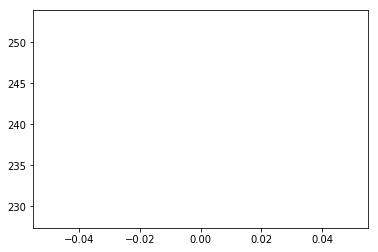

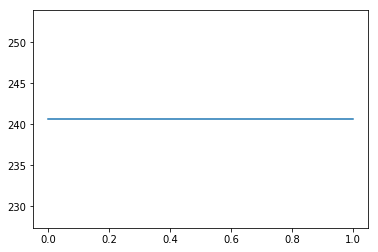

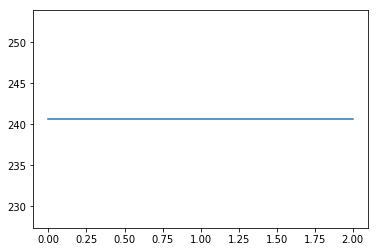

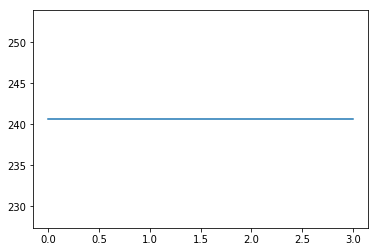

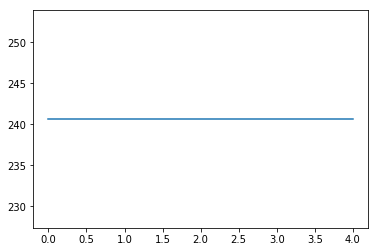

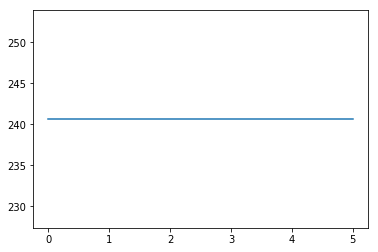

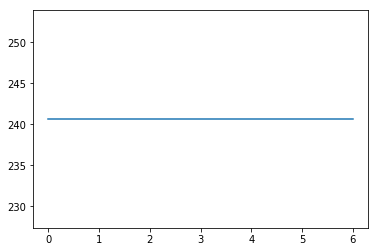

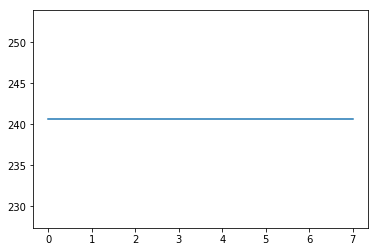

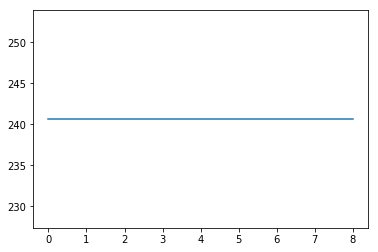

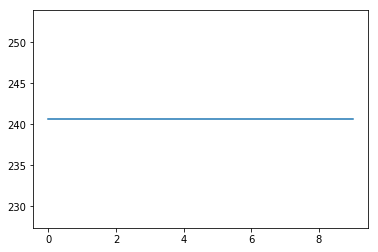

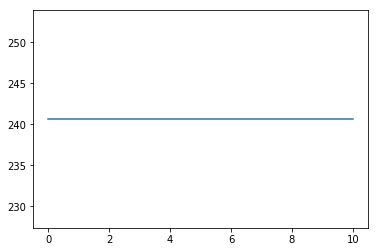

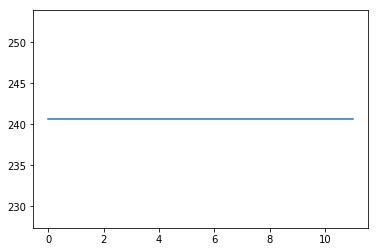

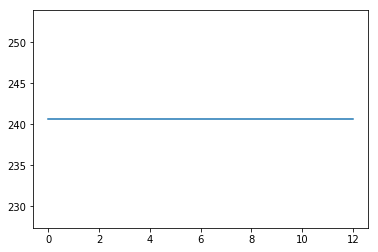

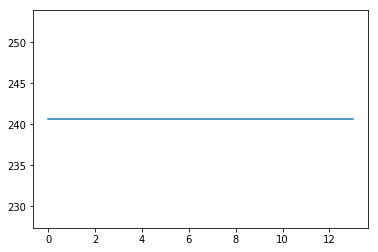

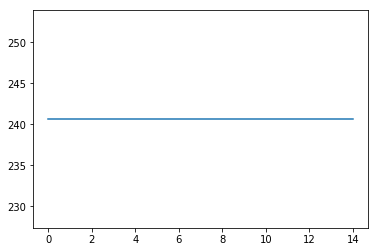

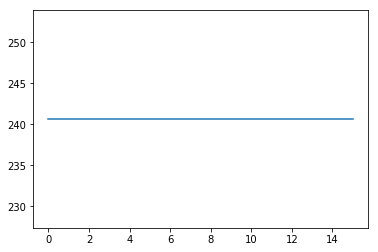

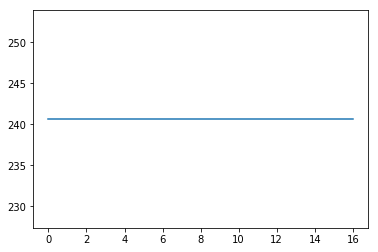

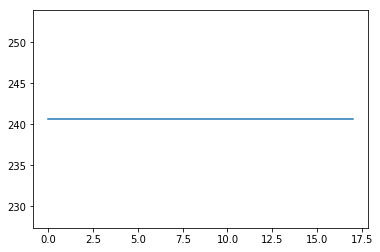

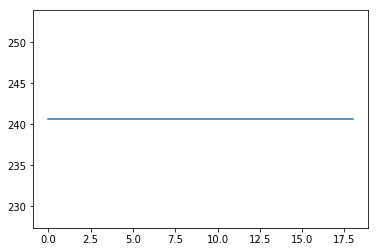

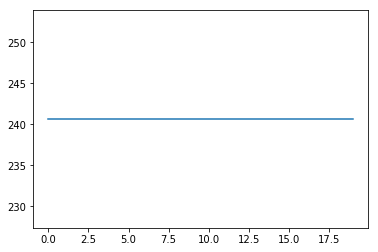

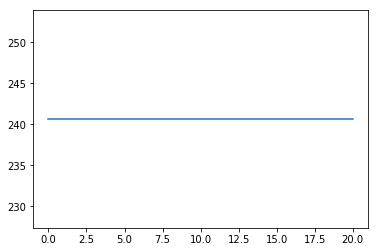

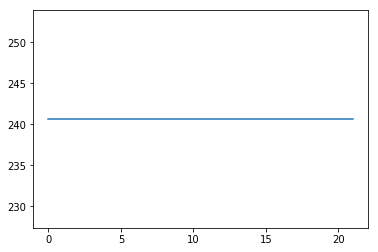

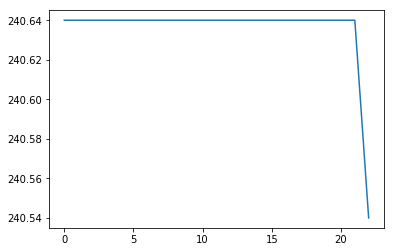

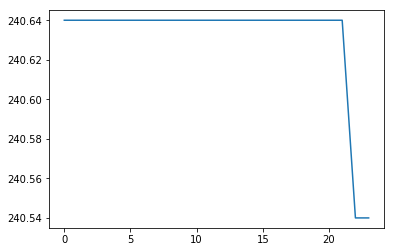

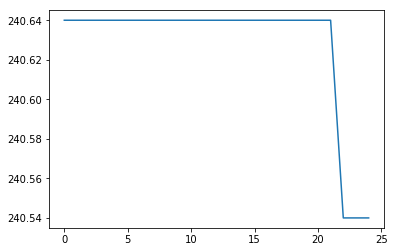

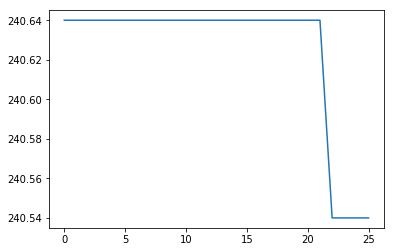

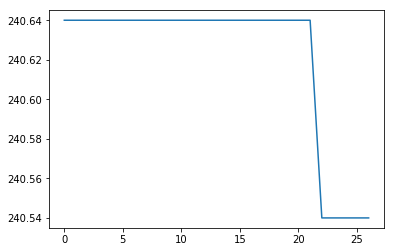

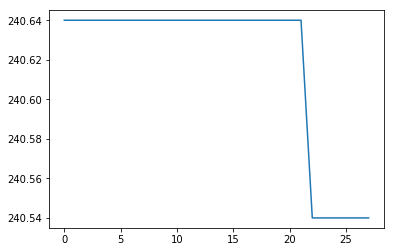

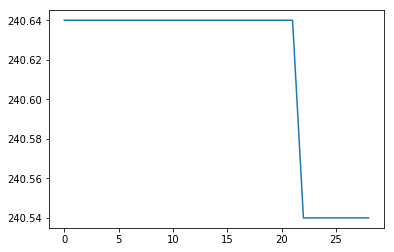

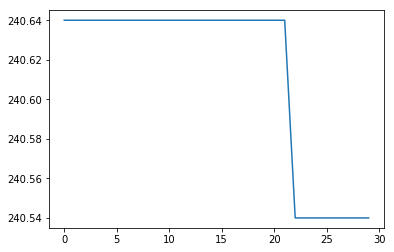

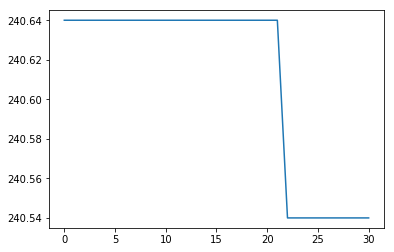

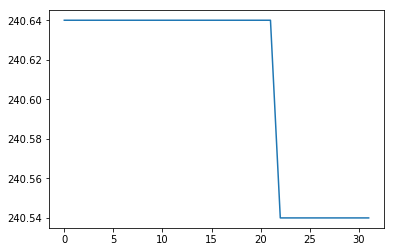

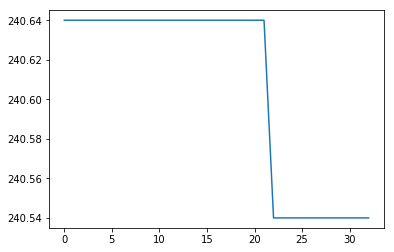

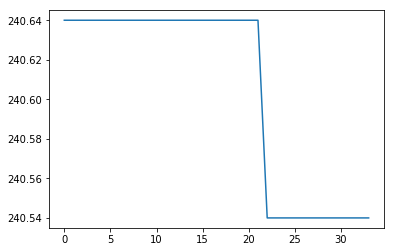

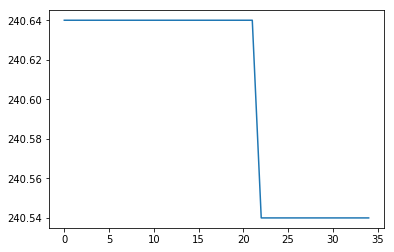

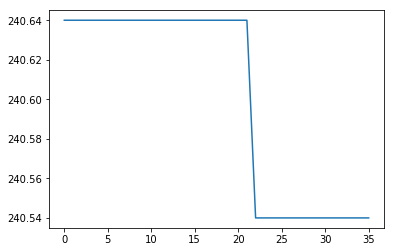

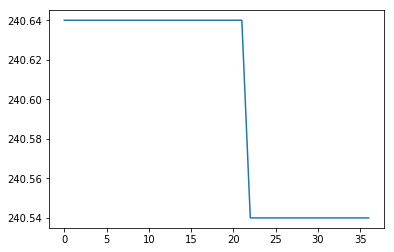

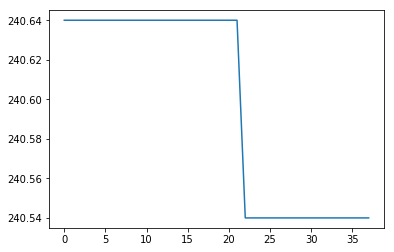

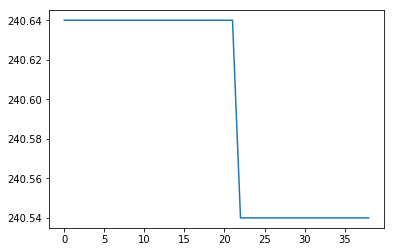

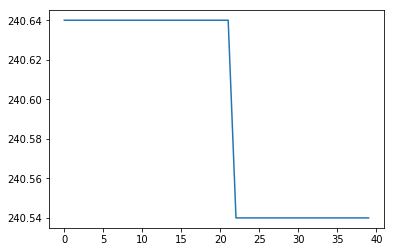

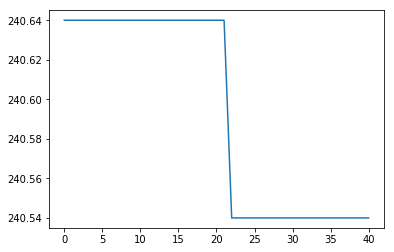

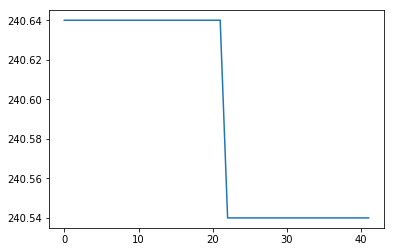

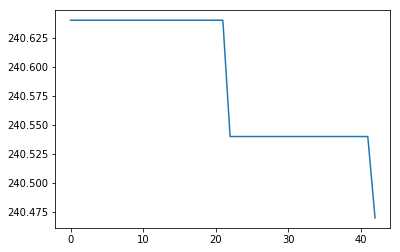

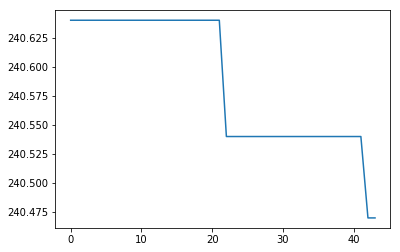

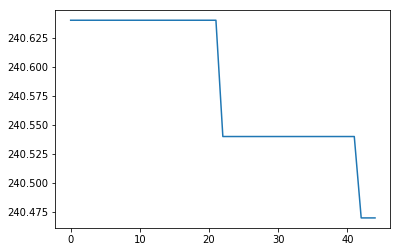

KeyboardInterrupt: 

In [66]:
import matplotlib.pyplot as plt
from drawnow import drawnow

def make_fig():
    plt.plot(x, y)
    #plt.scatter(x,y)  # creates scatter plot instead of line graph

plt.ion()  # enable interactivity
fig = plt.figure()  # make a figure

x = list()
y = list()

for i in range(1000):
    temp_y = float(StockPrice())
    x.append(i)
    y.append(temp_y)  # or any arbitrary update to your figure's data
    i += 1
    drawnow(make_fig)
    plt.pause(0.05)